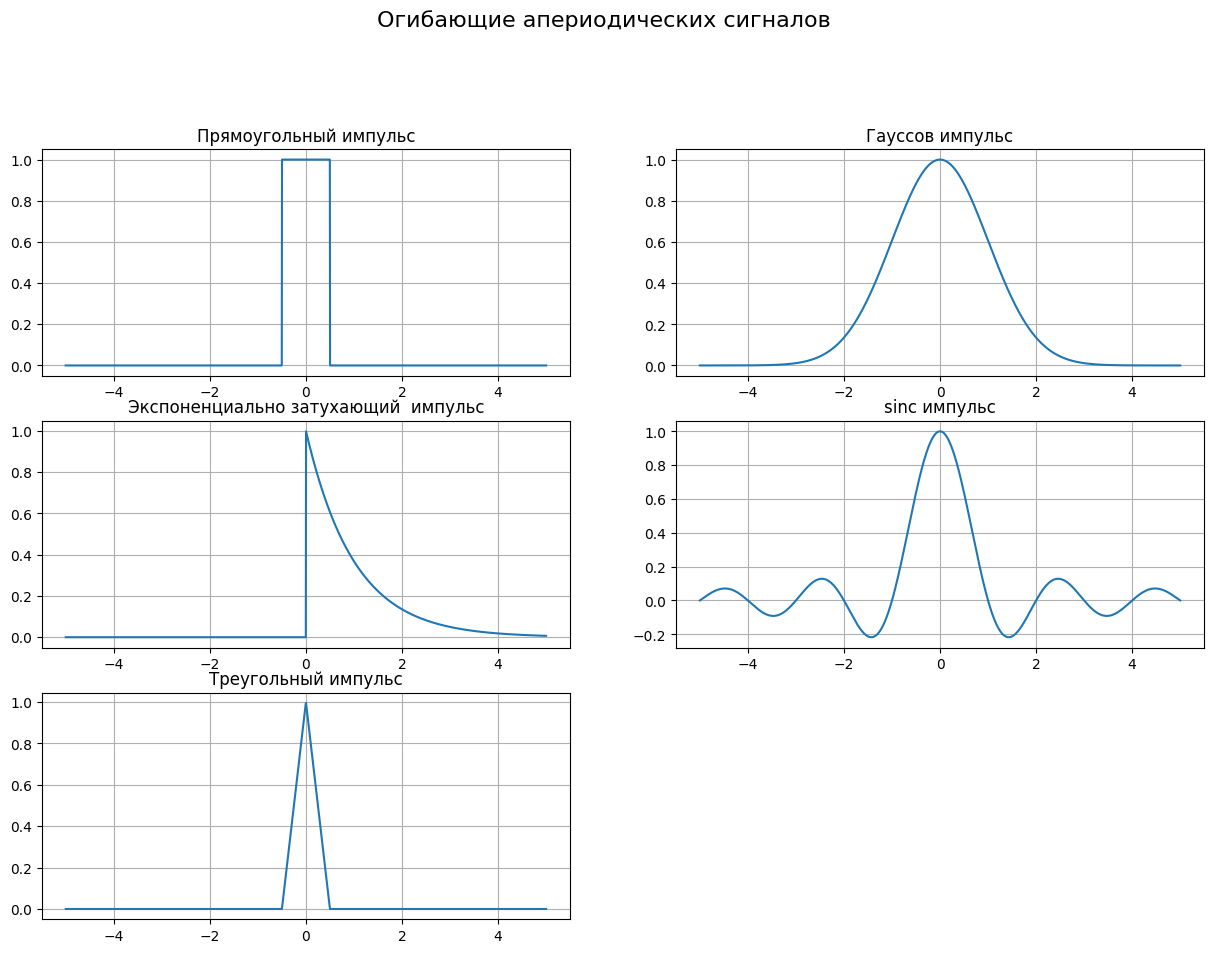

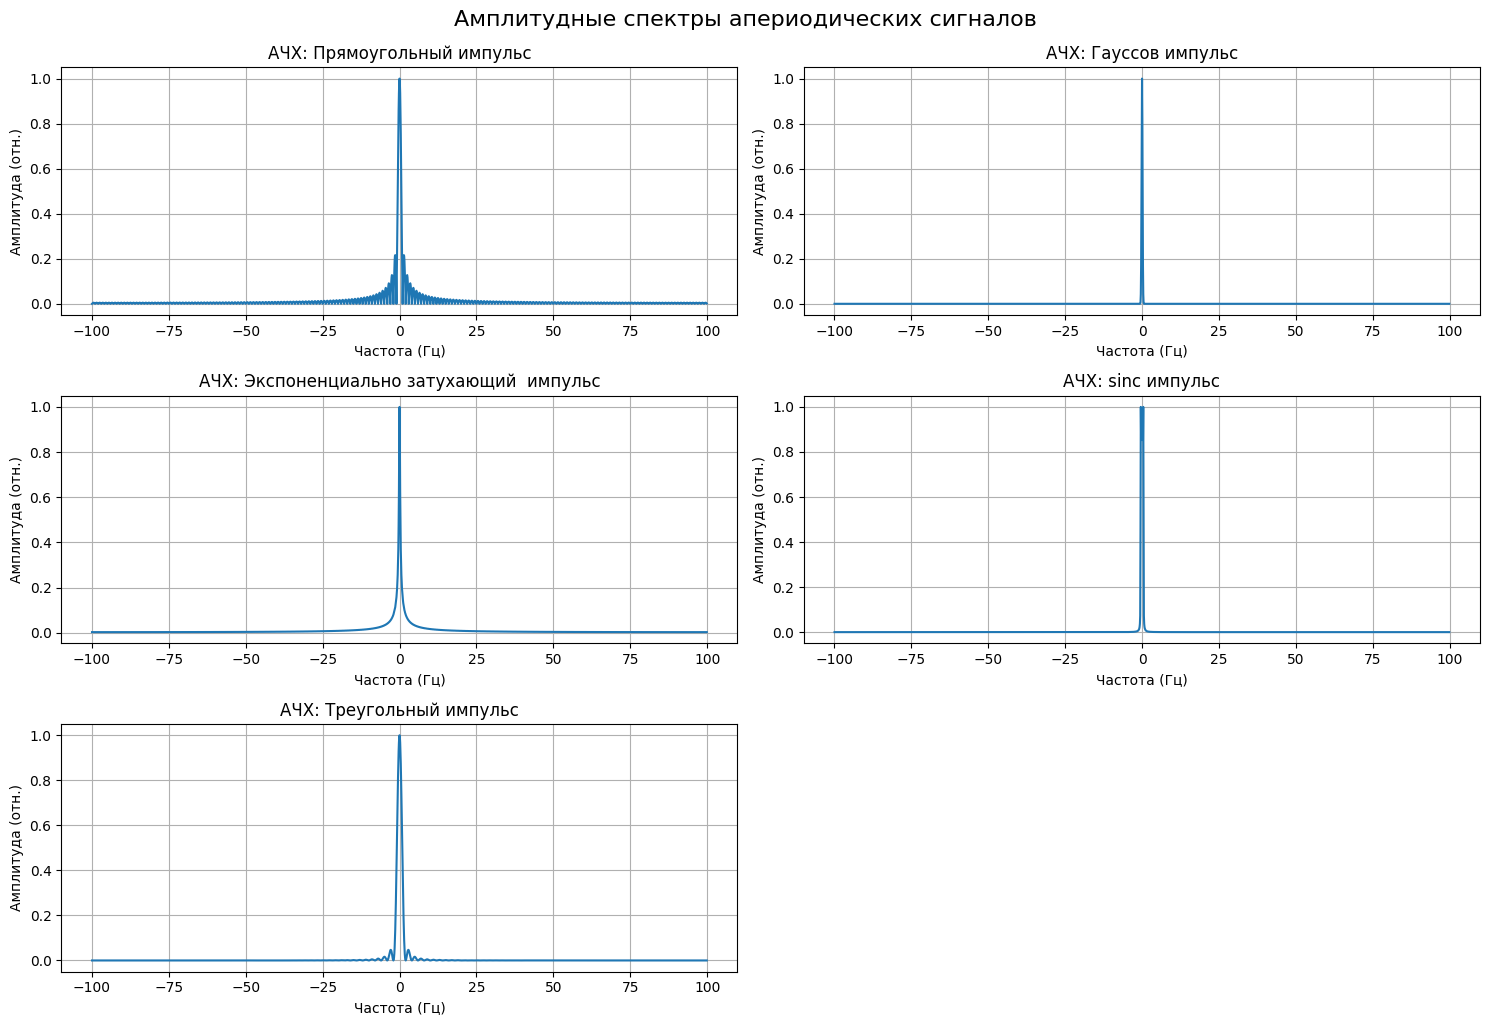

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Временная ось
t = np.linspace(-5, 5, 2000)

# Параметры по умолчанию
A = 1
T = 1
sigma = 1
alpha = 1
t0 = 0

# Импульсы
# 1. Прямоугольный
rect = np.where(np.abs(t) <= T/2, A, 0)

# 2. Гауссов
gauss = A * np.exp(-((t - t0)**2) / (2 * sigma**2))

# 3. Экспоненциальный
exp_decay = np.where(t >= 0, A * np.exp(-alpha * t), 0)

# 4. sinc
sinc = A * np.sinc(t / T)

# 5. Треугольный
tri = np.where(np.abs(t) <= T/2, A * (1 - 2 * np.abs(t) / T), 0)


signals = [rect, gauss, exp_decay, sinc, tri]
titles = ["Прямоугольный", "Гауссов", "Экспоненциально затухающий ", "sinc", "Треугольный"]

# --- Построение огибающих ---
plt.figure(figsize=(15, 10))
for i, sig in enumerate(signals):
    plt.subplot(3, 2, i+1)
    plt.plot(t, sig)
    plt.title(f"{titles[i]} импульс")
    plt.grid(True)
plt.suptitle("Огибающие апериодических сигналов", fontsize=16, y=1.02)
plt.show()

# --- Построение амплитудных спектров ---
# Частотная ось
N = len(t)
dt = t[1] - t[0]
freqs = fftshift(fftfreq(N, dt))

# Функция для расчёта амплитудного спектра
def amplitude_spectrum(signal):
    spectrum = fftshift(np.abs(fft(signal)))
    return spectrum / max(spectrum)  # нормализация

plt.figure(figsize=(15, 10))
for i, sig in enumerate(signals):
    spectrum = amplitude_spectrum(sig)
    plt.subplot(3, 2, i+1)
    plt.plot(freqs, spectrum)
    plt.title(f"АЧХ: {titles[i]} импульс")
    plt.grid(True)
    plt.xlabel("Частота (Гц)")
    plt.ylabel("Амплитуда (отн.)")
plt.tight_layout()
plt.suptitle("Амплитудные спектры апериодических сигналов", fontsize=16, y=1.02)
plt.show()


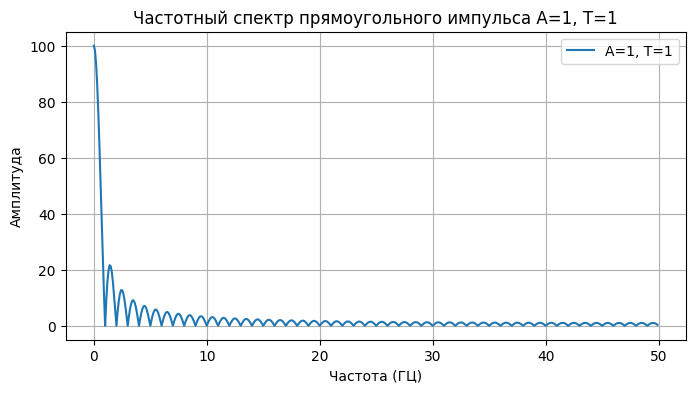

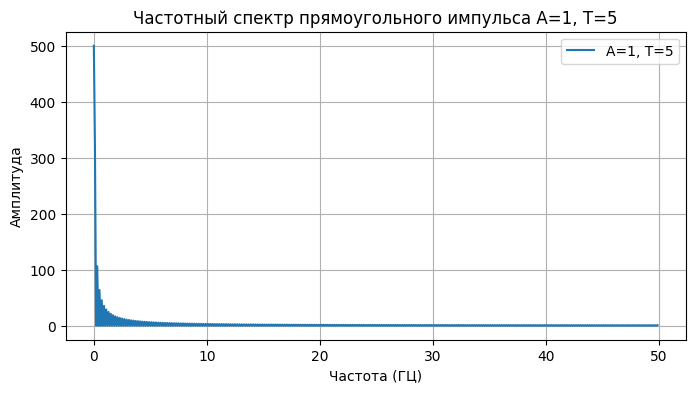

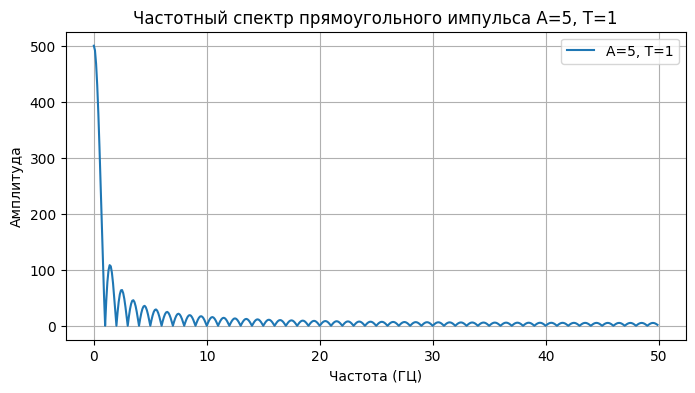

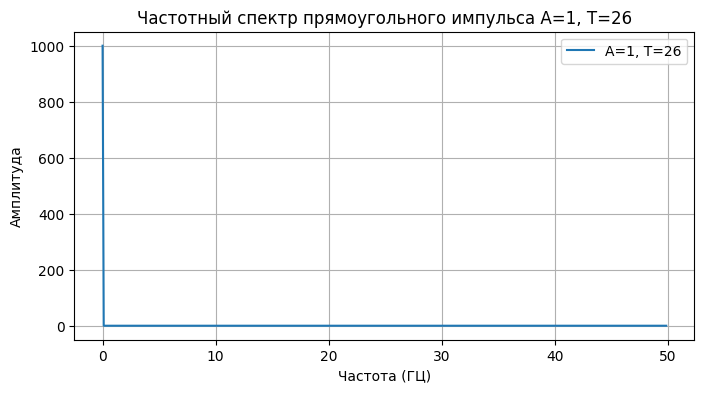

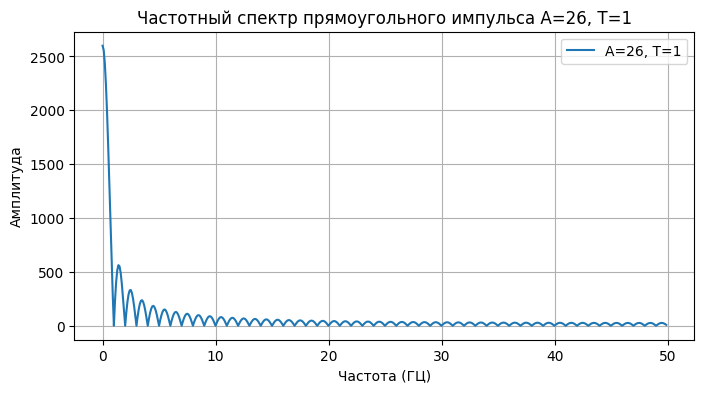

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t = np.linspace(-5, 5, 1000)

def rectangular_pulse(A, T):
    signal = np.where(np.abs(t) <= T/2, A, 0)
    spectrum = np.abs(fft(signal))
    frequencies = fftfreq(len(t), d=(t[1] - t[0]))
    return signal, spectrum, frequencies

parameters = [(1, 1), (1, 5), (5,1), (1, 26), (26, 1)]  # (A, T)

for A, T in parameters:
    signal, spectrum, frequencies = rectangular_pulse(A, T)

    plt.figure(figsize=(8, 4))
    plt.plot(frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2], label=f"A={A}, T={T}")
    plt.title(f"Частотный спектр прямоугольного импульса A={A}, T={T}")
    plt.xlabel("Частота (ГЦ)")
    plt.ylabel("Амплитуда")
    plt.legend()
    plt.grid()
    plt.show()


>**Как можно заметить, при увеличении A, возрастает амплитуда сигнала. При увеличении T (длительность импульса) увеличивается амплитуда и сигнал снижается.**

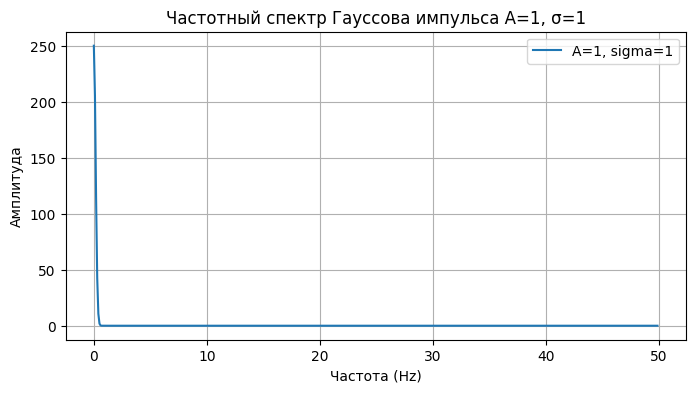

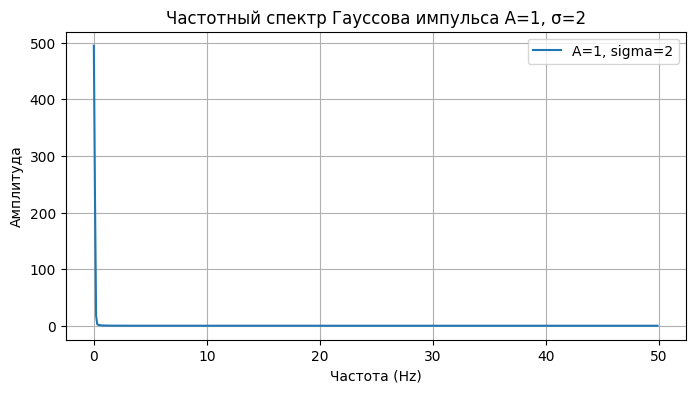

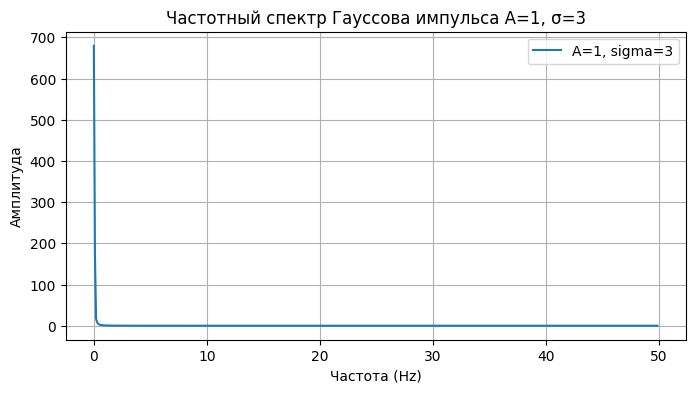

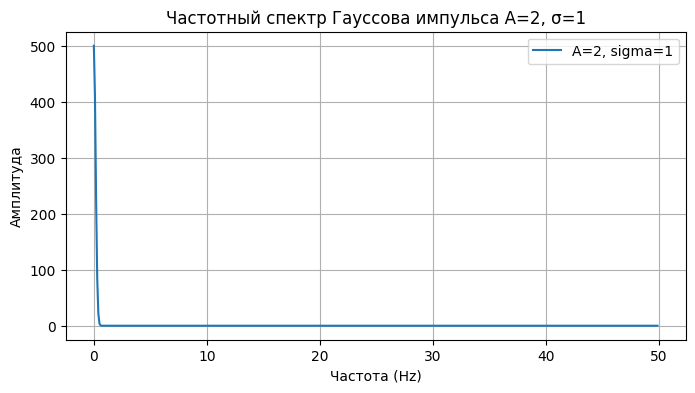

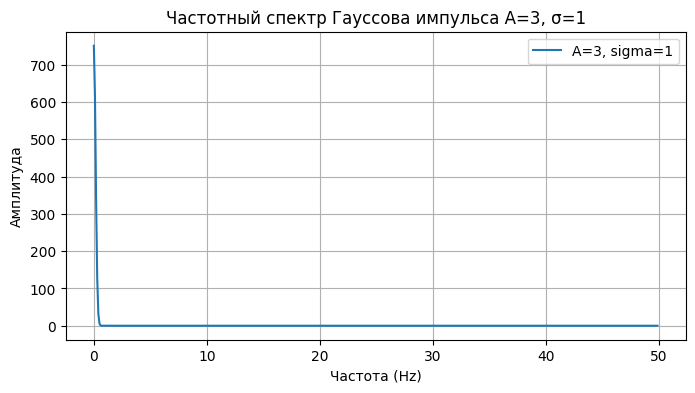

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t = np.linspace(-5, 5, 1000)

def gaussian_pulse(A, sigma):
    signal = A * np.exp(-t**2 / (2 * sigma**2))
    spectrum = np.abs(fft(signal))
    frequencies = fftfreq(len(t), d=(t[1] - t[0]))
    return signal, spectrum, frequencies

parameters = [(1, 1), (1, 2), (1, 3), (2,1), (3,1)]

for A, sigma in parameters:
    signal, spectrum, frequencies = gaussian_pulse(A, sigma)

    plt.figure(figsize=(8, 4))
    plt.plot(frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2], label=f"A={A}, sigma={sigma}")
    plt.title(f"Частотный спектр Гауссова импульса A={A}, σ={sigma}")
    plt.xlabel("Частота (Hz)")
    plt.ylabel("Амплитуда")
    plt.legend()
    plt.grid()
    plt.show()


>**При изменении sigma  (ширины импульса) частотный спектр сжимается, а амплитуда увеличивается.**

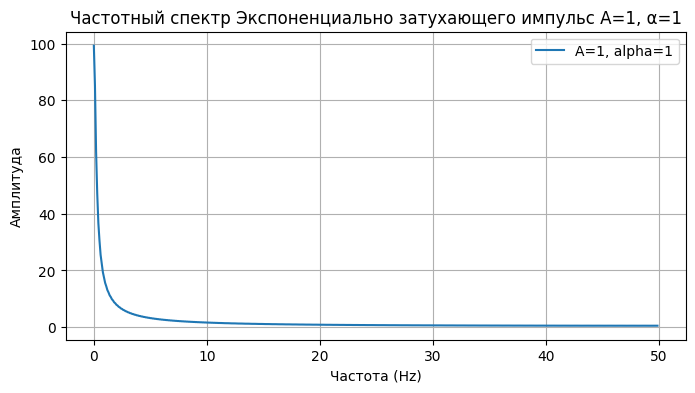

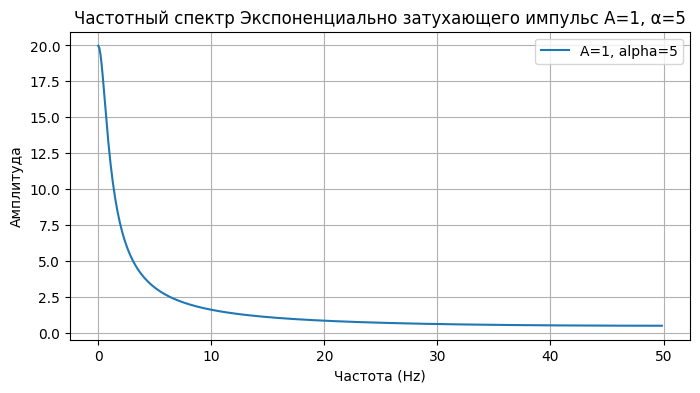

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t = np.linspace(-5, 5, 1000)

def exponential_pulse(A, alpha):
    signal = np.where(t >= 0, A * np.exp(-alpha * t), 0)
    spectrum = np.abs(fft(signal))
    frequencies = fftfreq(len(t), d=(t[1] - t[0]))
    return signal, spectrum, frequencies

parameters = [(1, 1), (1, 5)]

for A, alpha in parameters:
    signal, spectrum, frequencies = exponential_pulse(A, alpha)

    plt.figure(figsize=(8, 4))
    plt.plot(frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2], label=f"A={A}, alpha={alpha}")
    plt.title(f"Частотный спектр Экспоненциально затухающего импульс A={A}, α={alpha}")
    plt.xlabel("Частота (Hz)")
    plt.ylabel("Амплитуда")
    plt.legend()
    plt.grid()
    plt.show()


>**Как можно заметить, при изменении A увеличивается только амплитуда, при изменении alpha (коэффициент затухания) уменьшается амплитуда и график становится сигнал плоским**

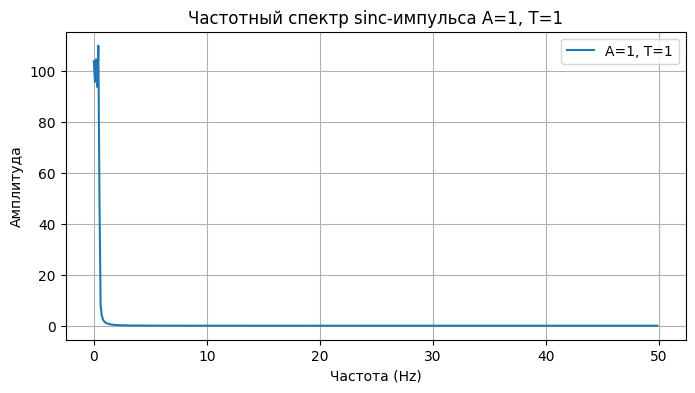

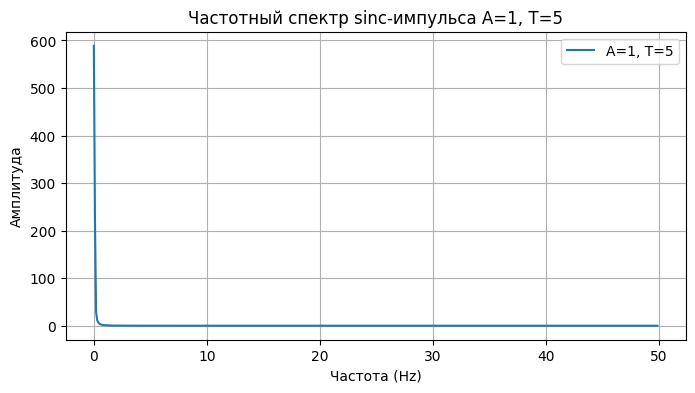

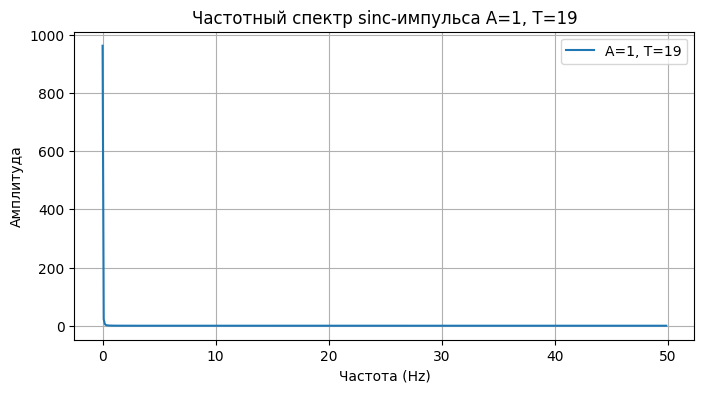

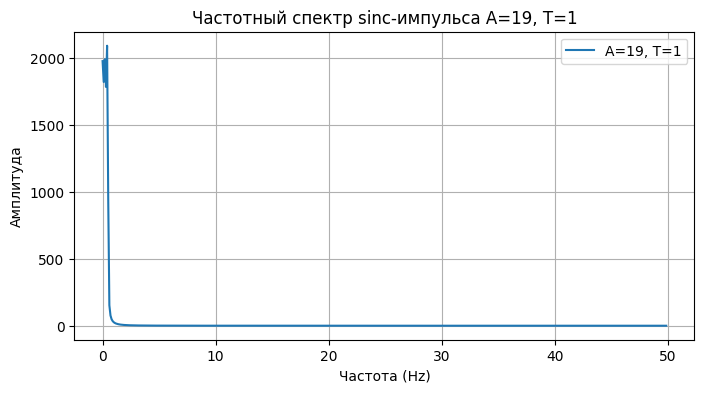

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t = np.linspace(-5, 5, 1000)

def sinc_pulse(A, T):
    signal = A * np.sinc(t / T)
    spectrum = np.abs(fft(signal))
    frequencies = fftfreq(len(t), d=(t[1] - t[0]))
    return signal, spectrum, frequencies

parameters = [(1, 1), (1, 5), (1, 19), (19, 1)]

for A, T in parameters:
    signal, spectrum, frequencies = sinc_pulse(A, T)

    plt.figure(figsize=(8, 4))
    plt.plot(frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2], label=f"A={A}, T={T}")
    plt.title(f"Частотный спектр sinc-импульса A={A}, T={T}")
    plt.xlabel("Частота (Hz)")
    plt.ylabel("Амплитуда")
    plt.legend()
    plt.grid()
    plt.show()


>**При увеличивании T (ширины импульса), амплитуда сигнала увеличивается, но сам сигнал сжимается.**

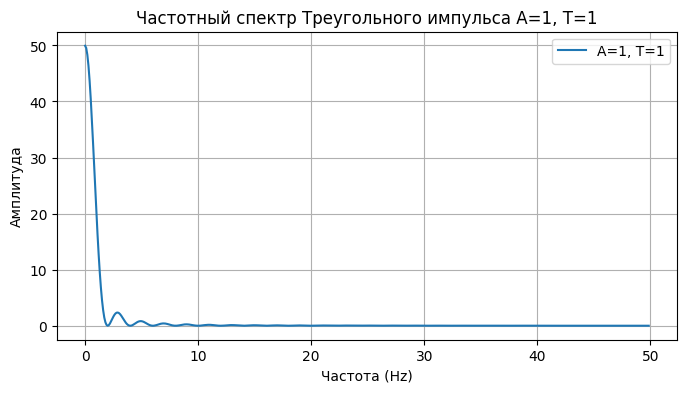

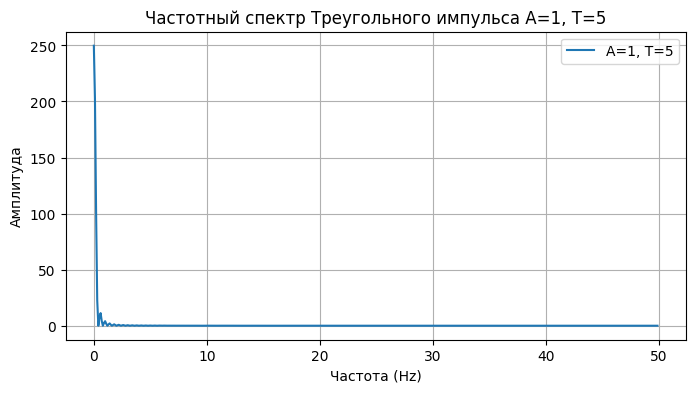

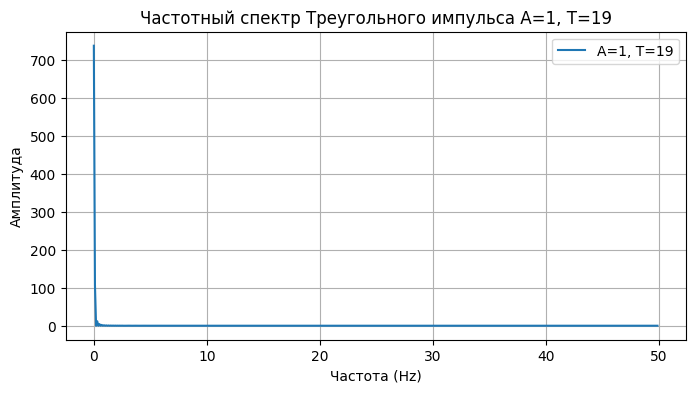

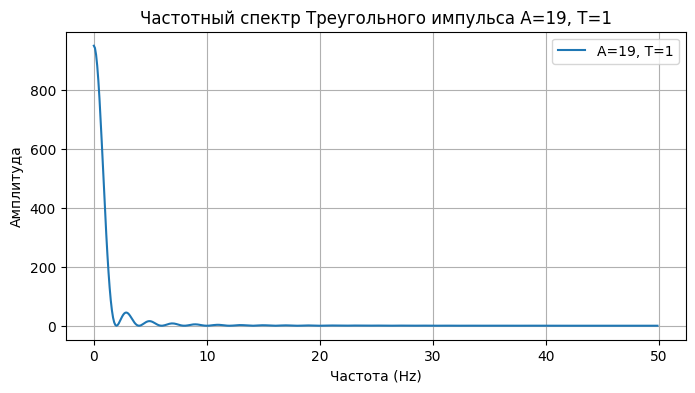

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t = np.linspace(-5, 5, 1000)

def triangular_pulse(A, T):
    signal = np.where(np.abs(t) <= T/2, A * (1 - 2 * np.abs(t) / T), 0)
    spectrum = np.abs(fft(signal))
    frequencies = fftfreq(len(t), d=(t[1] - t[0]))
    return signal, spectrum, frequencies

parameters = [(1, 1), (1, 5), (1, 19), (19, 1)]

for A, T in parameters:
    signal, spectrum, frequencies = triangular_pulse(A, T)

    plt.figure(figsize=(8, 4))
    plt.plot(frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2], label=f"A={A}, T={T}")
    plt.title(f"Частотный спектр Треугольного импульса A={A}, T={T}")
    plt.xlabel("Частота (Hz)")
    plt.ylabel("Амплитуда")
    plt.legend()
    plt.grid()
    plt.show()


>**При изменении T (длительности импульса) амплитуда увеличивается, но сигнал становится короче. При увеличении A просто увеличивается амплитуда сигнала**